In [52]:
#2c
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
#2c
weekdays_index = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
feature_names = ['Week', 'DayOfWeek','BackupStartTime', 'WorkFlowID', 'Filename','SizeOfBackup','BackupTime']
df = pd.read_csv('/Applications/EE 219/Project4/network_backup_dataset.csv', names = feature_names, header = 0)
df.drop(6)
y = np.asarray(df['SizeOfBackup'].values, dtype=np.float)
def weekday_enc(days):
    result = []
    for day in days:
        result.append(weekdays_index[day])
    return result
def file_enc(files):
    result = []
    for file in files:
        a,b = file.split('_')
        result.append(int(b))
    return result
def workflow_enc(work_flows):
    result = []
    for wf in work_flows:
        a,b,c = wf.split('_')
        result.append(int(c))
    return result
X = df.ix[:, [0, 1, 2, 3, 4]].values
print(X[9])
X[:, 1] = weekday_enc(X[:, 1])
X[:, 3] = workflow_enc(X[:, 3])
X[:, 4] = file_enc(X[:, 4])
print(X.shape)

[1 'Monday' 1 'work_flow_3' 'File_21']
(18588, 5)


/Users/poojajn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [29]:
t_data = pd.DataFrame(X).astype('float64')
onehot_encoded = []
label_enc = LabelEncoder()
integer_enc = t_data.apply(label_enc.fit_transform)
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_enc)
onehot_encoded.shape

(18588, 63)

In [41]:
activation_functions = ['relu', 'logistic', 'tanh']
hidden_layer_size = [2, 5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

rmse_relu = np.zeros(shape=(len(hidden_layer_size),2))
rmse_logistic = np.zeros(shape=(len(hidden_layer_size),2))
rmse_tanh = np.zeros(shape=(len(hidden_layer_size),2))

for activation_func in activation_functions:
    train_rmse_values = []
    test_rmse_values = []
    for layer_size in hidden_layer_size:
        temp_train_rmse = 0
        temp_test_rmse = 0
        kf = KFold(n_splits=10)
        model_cv = MLPRegressor(hidden_layer_sizes=(layer_size,),activation=activation_func)
        for train, test in kf.split(onehot_encoded,y):
            model_cv.fit(onehot_encoded[train],y[train])
            y_pred_train = model_cv.predict(onehot_encoded[train])
            y_pred_test = model_cv.predict(onehot_encoded[test])
            temp_train_rmse += sqrt(mean_squared_error(y[train],y_pred_train))
            temp_test_rmse += sqrt(mean_squared_error(y[test],y_pred_test))
        val1 = temp_train_rmse/10.0
        val2 = temp_test_rmse/10.0
        print("Activation Function "+ activation_func+" Hidden Layer Size " + str(layer_size)+" Train RMSE: "+str(val1) + " Test RMSE: " + str(val2))
        train_rmse_values.append(val1)
        test_rmse_values.append(val2)
    if(activation_func=='relu'):
        rmse_relu[:,0] = np.array(train_rmse_values)
        rmse_relu[:,1] = np.array(test_rmse_values)
    elif(activation_func=='logistic'):
        rmse_logistic[:,0] = np.array(train_rmse_values)
        rmse_logistic[:,1] = np.array(test_rmse_values)
    else:
        rmse_tanh[:,0] = np.array(train_rmse_values)
        rmse_tanh[:,1] = np.array(test_rmse_values)

Activation Function relu Hidden Layer Size 2 Train RMSE: 0.09036085218237849 Test RMSE: 0.11952559648014308
Activation Function relu Hidden Layer Size 5 Train RMSE: 0.07327972790315408 Test RMSE: 0.09168437943488364
Activation Function relu Hidden Layer Size 10 Train RMSE: 0.052700282170622434 Test RMSE: 0.08408323975690656
Activation Function relu Hidden Layer Size 50 Train RMSE: 0.026217465464027766 Test RMSE: 0.036487382338639254
Activation Function relu Hidden Layer Size 100 Train RMSE: 0.021962233859063714 Test RMSE: 0.03813168413274827
Activation Function relu Hidden Layer Size 150 Train RMSE: 0.019367599983546868 Test RMSE: 0.03555855118551389
Activation Function relu Hidden Layer Size 200 Train RMSE: 0.01829596459363709 Test RMSE: 0.03799380667195311
Activation Function relu Hidden Layer Size 250 Train RMSE: 0.017102184074322464 Test RMSE: 0.032574800239795636
Activation Function relu Hidden Layer Size 300 Train RMSE: 0.016763752318674892 Test RMSE: 0.030124054378774117
Activat

In [72]:
def plot_graphs(model, X, y):
    model.fit(X,y)
    y_pred = model.predict(X)
    residuals = y - y_pred
    plt.scatter(y, y_pred, s = 0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs True Values")
    plt.show()
    plt.scatter(y_pred, residuals, s = 0.5, color = 'green')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residues")
    plt.title("Residues vs Predicted Values")
    plt.show()

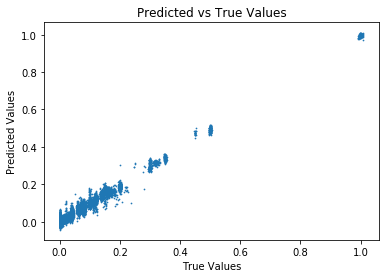

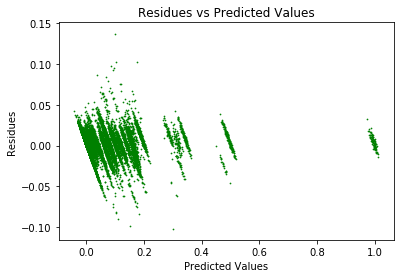

In [73]:
model = MLPRegressor(hidden_layer_sizes=(550,),activation="relu")
plot_graphs(model,onehot_encoded,y)

In [20]:
rmse_relu_2

array([[1., 0.],
       [2., 0.]])

In [42]:
np.argmin(rmse_relu[:,1])

13

In [43]:
rmse_relu[13,1]

0.02661989182664485

In [44]:
hidden_layer_size[13]

550

In [45]:
np.argmin(rmse_logistic[:,1])

5

In [46]:
rmse_logistic[5,1]

0.08959671117508135

In [47]:
hidden_layer_size[5]

150

In [48]:
np.argmin(rmse_tanh[:,1])

4

In [49]:
rmse_tanh[4,1]

0.06969843316755193

In [50]:
hidden_layer_size[4]

100

Text(0.5, 1.0, 'RMSE vs Hidden Unit Size')

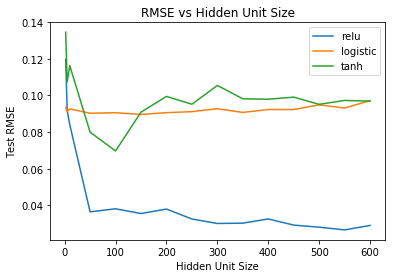

In [70]:
plt.plot(hidden_layer_size, rmse_relu[:,1], label='relu')
plt.plot(hidden_layer_size, rmse_logistic[:,1], label='logistic')
plt.plot(hidden_layer_size, rmse_tanh[:,1], label='tanh')
plt.legend(loc='upper right')
plt.xlabel("Hidden Unit Size")
plt.ylabel("Test RMSE")
plt.title("RMSE vs Hidden Unit Size")

In [74]:
#2e
data = pd.read_csv("network_backup_dataset.csv");
print(data.columns)
X = data[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day','Work-Flow-ID', 'File Name']].values
y = data['Size of Backup (GB)'].values
encode_col = [0, 1, 2, 3, 4]
encoders = {}
for col in encode_col:
    le = preprocessing.LabelEncoder()
    le.fit(X[:,col])
    X[:,col] = le.transform(X[:,col])
    encoders[col] = le

Index(['Week #', 'Day of Week', 'Backup Start Time - Hour of Day',
       'Work-Flow-ID', 'File Name', 'Size of Backup (GB)',
       'Backup Time (hour)'],
      dtype='object')


In [66]:
#2e
from sklearn.neighbors import KNeighborsRegressor
train_rmse_values = []
test_rmse_values = []
neighbor_size = range(1,100)
for n_size in neighbor_size:
    temp_train_rmse = 0
    temp_test_rmse = 0
    kf = KFold(n_splits=10)
    model_cv = KNeighborsRegressor(n_neighbors=n_size)
    for train, test in kf.split(X,y):
        model_cv.fit(X[train],y[train])
        y_pred_train = model_cv.predict(X[train])
        y_pred_test = model_cv.predict(X[test])
        temp_train_rmse += sqrt(mean_squared_error(y[train],y_pred_train))
        temp_test_rmse += sqrt(mean_squared_error(y[test],y_pred_test))
    val1 = temp_train_rmse/10.0
    val2 = temp_test_rmse/10.0
    print("Neighbor Size "+ str(n_size) + " Train RMSE: "+str(val1) + " Test RMSE: " + str(val2))
    train_rmse_values.append(val1)
    test_rmse_values.append(val2)


Neighbor Size 1 Train RMSE: 0.0 Test RMSE: 0.076720291090895
Neighbor Size 2 Train RMSE: 0.04003217717391043 Test RMSE: 0.07252656159722706
Neighbor Size 3 Train RMSE: 0.036798753783884634 Test RMSE: 0.070365517474963
Neighbor Size 4 Train RMSE: 0.03692803955035499 Test RMSE: 0.07120756055062623
Neighbor Size 5 Train RMSE: 0.03822382906980101 Test RMSE: 0.07148501019297168
Neighbor Size 6 Train RMSE: 0.03922978810987694 Test RMSE: 0.0723866404076951
Neighbor Size 7 Train RMSE: 0.04028648090514872 Test RMSE: 0.07255374818770728
Neighbor Size 8 Train RMSE: 0.04299919230229342 Test RMSE: 0.07324126705075314
Neighbor Size 9 Train RMSE: 0.04610231554344308 Test RMSE: 0.07432873294440182
Neighbor Size 10 Train RMSE: 0.04924096542040224 Test RMSE: 0.07510277937793458
Neighbor Size 11 Train RMSE: 0.05179916012795891 Test RMSE: 0.07591499311060164
Neighbor Size 12 Train RMSE: 0.054058027635190256 Test RMSE: 0.07687287441242155
Neighbor Size 13 Train RMSE: 0.055902786207289945 Test RMSE: 0.07749

In [67]:
np.argmin(test_rmse_values)

2

In [68]:
neighbor_size[2]

3

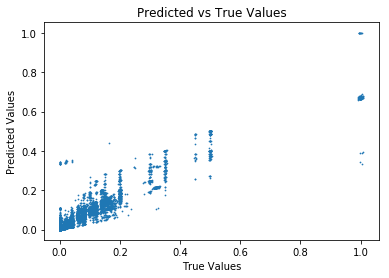

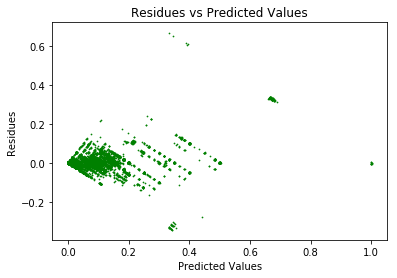

In [75]:
model = KNeighborsRegressor(n_neighbors=3)
plot_graphs(model,X,y)

In [76]:
neighbor_size

range(1, 100)

In [93]:
col1 = np.array(neighbor_size)

In [83]:
col2 = np.array(train_rmse_values)
col2.shape

(99,)

In [84]:
col3 = np.array(test_rmse_values)
col3.shape

(99,)

In [87]:
np.vstack((col1,col2,col3)).shape

(3, 99)